<a href="https://colab.research.google.com/github/vinicius-mattoso/GA_find_percolation/blob/main/Projeto_GA_Maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libs import

In [1]:
import random
import numpy as np
from matplotlib import colors
# !pip install deap
import matplotlib.pyplot as plt


random.seed(10)

# Funções de visualização

### Desenho do Maze

In [2]:
# random.seed(10)
def draw_maze(maze, starts, ends, path=None):
    cmap = colors.ListedColormap(['white', 'black', 'red', 'blue'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(maze, cmap=cmap, norm=norm)

    for start in starts:
        ax.plot(start[1], start[0], 'go', markersize=5)

    for end in ends:
        ax.plot(end[1], end[0], 'ro', markersize=5)

    if path is not None:
        for i in range(len(path)-1):
            curr_pos = path[i]
            next_pos = path[i+1]
            ax.plot([curr_pos[1], next_pos[1]], [curr_pos[0], next_pos[0]], 'b-', linewidth=3)

    plt.show()

### Visualização do Maze + path

In [3]:
def visualize_maze(maze, start_points, end_points, path):
    maze_height = len(maze)
    maze_width = len(maze[0])

    # Create a figure and axis for the maze visualization
    fig, ax = plt.subplots()

    # Draw the maze
    for i in range(maze_height):
        for j in range(maze_width):
            if maze[i][j] == 1:  # Wall
                ax.add_patch(plt.Rectangle((j, maze_height - i - 1), 1, 1, facecolor='black'))

    # Scatter plot the path
    path_x = [point[1] + 0.5 for point in path]
    path_y = [maze_height - point[0] - 0.5 for point in path]
    ax.scatter(path_x, path_y, color='blue', marker='o')

    # Mark the start and end points
    for start_point in start_points:
        ax.scatter(start_point[1] + 0.5, maze_height - start_point[0] - 0.5, color='green', marker='s', s=100, label='Start')
    for end_point in end_points:
        ax.scatter(end_point[1] + 0.5, maze_height - end_point[0] - 0.5, color='red', marker='s', s=100, label='End')

    # Set axis limits and labels
    ax.set_xlim([0, maze_width])
    ax.set_ylim([0, maze_height])
    ax.set_aspect('equal')
    ax.set_xticks(range(maze_width))
    ax.set_yticks(range(maze_height))
    ax.set_xticklabels(range(maze_width))
    ax.set_yticklabels(range(maze_height))

    # Add a legend
    ax.legend(loc='best')

    # Show the maze visualization
    plt.show()

### Função para criação do Maze

In [4]:
# random.seed(10)
def create_maze(size):
    maze = np.zeros(size, dtype=int)

    # Generate random walls
    for i in range(size[0]):
        for j in range(size[1]):
            # if random.random() < 0.3:
              if random.random() < 0.25:
                maze[i, j] = 1

    return maze

### Rotina que vai receber o maze e retornar uma lista com a entrada e a saída

In [5]:
def get_strats_and_ends (maze):
  start = 0
  end = len(maze)-1
  entradas = maze[:,0]
  lista_entradas = []
  linhas_entradas = np.where(entradas == 0)
  linhas_entradas = linhas_entradas[0].tolist()
  for i in range(0,len(linhas_entradas)):
      # print(i)
      lista_entradas.append((linhas_entradas[i], start))

  saidas = maze[:,-1]
  lista_saidas = []
  linhas_saidas = np.where(saidas == 0)
  linhas_saidas = linhas_saidas[0].tolist()
  for i in range(0,len(linhas_saidas)):
      # print(i)
      lista_saidas.append((linhas_saidas[i], end))


  starts = lista_entradas
  ends = lista_saidas

  return starts,ends

### Rotina que faz o decode da lista da seuquencia de passos

In [6]:
def decode_gene(gene, start_point, end_point, maze):
    movements = {
        1: (-1, 0),  # Up
        2: (1, 0),   # Down
        3: (0, -1),  # Left
        4: (0, 1)    # Right
    }
    
    current_point = start_point#[0,0]
    path = [[current_point[0], current_point[1]]]
    
    for direction in gene:
        movement = movements[direction]
        new_point = (current_point[0] + movement[0], current_point[1] + movement[1])
        
        if (
            new_point[0] >= 0 and new_point[0] < len(maze) and
            new_point[1] >= 0 and new_point[1] < len(maze[0]) and
            maze[new_point[0]][new_point[1]] == 0
        ):
            current_point = new_point
            path.append([current_point[0], current_point[1]])
        
        if current_point == end_point:
            break
    
    return path

### Criação da função de decode

OBS: Vamos fazer uma função que retorna a distância entre o ultimo ponto decodificado e o final do maze.

Caso chegue antes, ele precisa parar de decodificar.

O retorno dela vai ser a quantidade de passos percorridos.

Essa distância vai ser utlizado para o calculo da fitness (1/dist), e vamos buscar maximizar isso.

In [7]:
start = 0
end  = 5

maze = create_maze((end+1, end+1))
maze.shape

(6, 6)

### Criação de um path de gabarito para avaliar as funções

In [8]:
caminho_gabarito = [4,4,2,2,4,4,4,1,1]

### Criação dos starts and end points

In [9]:
starts,ends = get_strats_and_ends(maze)
starts

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]

### Desenhando as entradas e saídas no maze

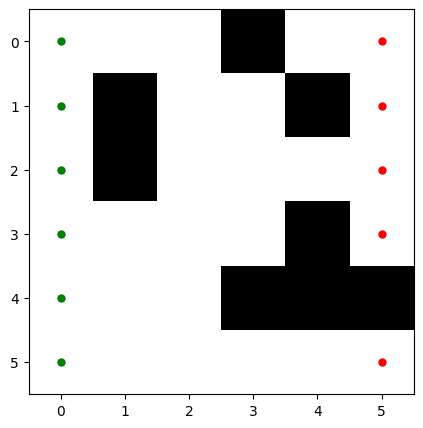

In [10]:
draw_maze(maze, starts, ends)

#### Exibindo um resultado de caminho

In [11]:
caminho_gabarito

[4, 4, 2, 2, 4, 4, 4, 1, 1]

In [12]:
starts

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)]

In [13]:
list(starts[0])

[0, 0]

In [14]:
start_point = list(starts[0])
end_point = list(ends[0])

In [15]:
caminho_gabarito_list = decode_gene(caminho_gabarito, start_point, end_point, maze)
caminho_gabarito_list

[[0, 0],
 [0, 1],
 [0, 2],
 [1, 2],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [1, 5],
 [0, 5]]

In [16]:
end_point

[0, 5]

### ATENÇÃO: Para fazer o desenho, recebemos uma lista de tuplas, pois cada tupla é uma posição no maze

In [17]:
start_point_tuple_list = [starts[0]]
end_point_tuple_list = [ends[0]]

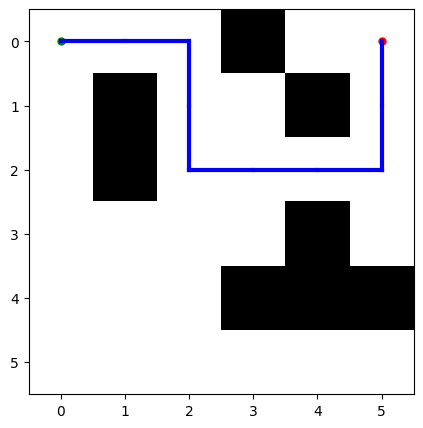

In [18]:
draw_maze(maze, start_point_tuple_list, end_point_tuple_list,caminho_gabarito_list)


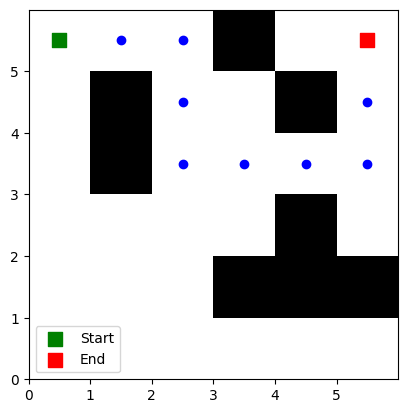

In [19]:
visualize_maze(maze, start_point_tuple_list, end_point_tuple_list,caminho_gabarito_list)